# Project 5
Author: Tommy Phung <br>
Target: Video Game Invenstors

In [1]:
import pandas as pd
from functions import data_cleaning as dc 

In [2]:
df = pd.read_csv('datasets/backloggd_games.csv', index_col= 0)

## Data Preperations

Before analysising the dataset, it needs to be cleaned for any missing data or any data that isn't needed for the project. <br>
Unnecessary columns are removed from the dataset that would not be used. **Wishlist, Playing and Backlog** are the number of people that want the game, is currently playing or planning on playing the selected game. This is subjective and doesn't indicate whether the game is good or bad. The column Plays, which are people that have played the game can give insight on actual players for the game. <br>

**TBD or To Be Determined** are games with not release date yet meaning that the game is too new to be analysis yet. 
Any duplicates are also removed. A thing to note is that games get rereleases so duplicates in titles are handled differently. 

The number of players in the columns **Plays and Reviews** are changed to integers for comparison. The letter **K**, stands for the thousands and changed accordingly. 

In [3]:
df.drop(['Wishlist', 'Backlogs','Playing', 'Lists'], axis = 1, inplace= True)
df.drop(df[df['Release_Date'] == 'TBD'].index, inplace= True)
df.drop_duplicates(inplace= True)    ### 

df['Plays'] = df['Plays'].apply(dc.value_to_float)
df['Reviews'] = df['Reviews'].apply(dc.value_to_float)

df.Release_Date = df.Release_Date.apply(lambda x: int(x[-4:]))

df.drop(df[df.Rating.isna()].index, inplace= True)
df.reset_index(drop= True, inplace= True)

## Data Distribution

While looking at the dataset, there is a couple of things to note in the distribution. For the number of ratings, it follows a normal distribution not including that the number of games that doesn't have a rating. 

**16.6 %** of the games were a developers **single game**. This could be misleading as some **developers changes names** or get **absorbed by companies** that would change what the game developers havppens to be. We would assume that this doesn't make a majority of games for now unless the number of games makes an impact. <br>
**15.1 %** of the games **doesn't have a game developer listed**. There is a number of reason other than missing developer name. **Newer unknown games** would have individual name rather than actual company name. This could be good to note the potential of these games since **not all good games are known or created by big companies.** 


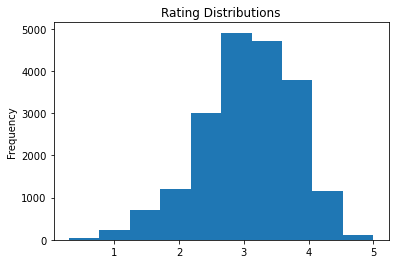

In [4]:
### Rating Distrbution 
df[df.Rating >= 0].Rating.plot(kind = 'hist', title = 'Rating Distributions', xlabel = 'Rating', sharex = False);


In [11]:
df.Genres = df.Genres.apply(dc.convert_to_list)

AttributeError: 'list' object has no attribute 'strip'

In [18]:
df.Developers = df.Developers.apply(dc.convert_to_list)

In [19]:
dev_df = pd.concat([pd.get_dummies(df['Developers'].explode(),drop_first= True).groupby(level=0).sum(), df[['Rating']]], axis= 1)

In [ ]:
df[['MOBA', 'Pinball', 'Quiz/Trivia', 'Card & Board Game', 'Real Time Strategy', 'Music', 'Tactical', '', 'Turn Based Strategy', 'Point-and-Click', 'Visual Novel', 'Brawler', 'Racing', 'Sport', 'Fighting', 'Arcade', 'Simulator', 'Strategy', 'Platform', 'Puzzle', 'Shooter', 'RPG', 'Indie', 'Adventure']] = 0

In [13]:
genre_df = pd.concat([pd.get_dummies(df['Genres'].explode(),drop_first= True).groupby(level=0).sum(), df[['Rating']]], axis= 1)

In [17]:
import statsmodels.api as sm

X = genre_df[genre_df.columns[:-1]]
y = genre_df.Rating

baseline_model = sm.OLS(y, sm.add_constant(X))
baseline_results = baseline_model.fit()

print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     43.28
Date:                Thu, 20 Jul 2023   Prob (F-statistic):          1.29e-190
Time:                        16:31:07   Log-Likelihood:                -20996.
No. Observations:               19867   AIC:                         4.204e+04
Df Residuals:                   19843   BIC:                         4.223e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.9660    

In [ ]:
import statsmodels.api as sm

X = dev_df[dev_df.columns[:500]]
y = dev_df.Rating

baseline_model = sm.OLS(y, sm.add_constant(X))
baseline_results = baseline_model.fit()

print(baseline_results.summary())

In [37]:
df['Developers']

0             [FromSoftware, Bandai Namco Entertainment]
1        [Nintendo, Nintendo EPD Production Group No. 3]
2                                     [Supergiant Games]
3                                          [Team Cherry]
4                                         [tobyfox, 8-4]
                              ...                       
19862                                       [Miju Games]
19863                   [Bright Future, Electronic Arts]
19864                                                 []
19865                                                 []
19866                        [Owlcat Games, Deep Silver]
Name: Developers, Length: 19867, dtype: object

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X = genre_df[genre_df.columns[:-1]]
y =  genre_df.Rating
X_train, X_test, y_train, y_test = train_test_split(X, y)
                                                            
classifier = DecisionTreeClassifier(random_state=10)  

classifier.fit(X_train, y_train) 

ValueError: Unknown label type: 'continuous'

In [38]:
genre_df

,Adventure,Arcade,Brawler,Card & Board Game,Fighting,Indie,MOBA,Music,Pinball,Platform,...,Racing,Real Time Strategy,Shooter,Simulator,Sport,Strategy,Tactical,Turn Based Strategy,Visual Novel,Rating
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.5
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.4
2,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.3
3,1,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.4
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,4.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19862,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,3.8
19863,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,2.5
19864,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,2.7
19865,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.7


In [41]:
genre_df[genre_df.columns[:-1]]

,Adventure,Arcade,Brawler,Card & Board Game,Fighting,Indie,MOBA,Music,Pinball,Platform,...,RPG,Racing,Real Time Strategy,Shooter,Simulator,Sport,Strategy,Tactical,Turn Based Strategy,Visual Novel
0,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19862,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
19863,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
19864,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
19865,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
